In [1]:
import torch
import numpy
import torchvision
import matplotlib.pyplot as plt

In [2]:
num_epoch = 2
batch_size = 100
learning_rate = 0.01

input_size = 784
hidden_size = 100
num_classes = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



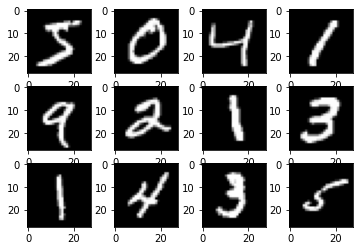

In [3]:
train_data = torchvision.datasets.MNIST(root="./data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root="./data", train=False, transform=torchvision.transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle=True)

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(train_data[i][0][0], cmap='gray')

In [4]:
class Network(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Network, self).__init__()
        self.lin1 = torch.nn.Linear(input_size, hidden_size)
        self.rel = torch.nn.ReLU()
        self.lin2 = torch.nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out_lin1 = self.lin1(x)
        out_rel = self.rel(out_lin1)
        out_lin2 = self.lin2(out_rel)

        return out_lin2

In [5]:
model = Network(input_size, hidden_size, num_classes).to(device)

criterion = torch.nn.CrossEntropyLoss()
optmizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
for epoch in range(num_epoch):
    for i, (images, lables) in enumerate(train_loader):

        images = images.reshape(-1, input_size).to(device)
        lables = lables.to(device)

        outputs = model(images)

        loss = criterion(outputs, lables)

        loss.backward()

        optmizer.step()
        optmizer.zero_grad()

        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1}/{num_epoch} | step {i+1}/{600}: loss = {loss.item():.4f}")

epoch 1/2 | step 100/600: loss = 0.3410
epoch 1/2 | step 200/600: loss = 0.1036
epoch 1/2 | step 300/600: loss = 0.1916
epoch 1/2 | step 400/600: loss = 0.2620
epoch 1/2 | step 500/600: loss = 0.1302
epoch 1/2 | step 600/600: loss = 0.0942
epoch 2/2 | step 100/600: loss = 0.0655
epoch 2/2 | step 200/600: loss = 0.0793
epoch 2/2 | step 300/600: loss = 0.0455
epoch 2/2 | step 400/600: loss = 0.1228
epoch 2/2 | step 500/600: loss = 0.0713
epoch 2/2 | step 600/600: loss = 0.0772


In [7]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc:.2f} %')

Accuracy of the network on the 10000 test images: 96.48 %
